Elementos de datos estructurados: Los datos proceden de muchas fuentes
(medición de sensores, eventos, texto, imágenes, videos) gracias al internet de las cosas (IoT)
Gran parte de estos datos no estan estructurados, por ejemplo, las imágenes son una colección
de píxeles y cada píxel contiene información sobre el color (RGB); los textos son 
secuencias de palabras y caracteres que no son palabras y a menudo organizado por secciones y 
subsecciones, etc.
Un desafío importante de la ciencia de datos es convertir estos datos sin procesar en información
útil. Para esto, los datos en bruto(no estructurados) deben procesarse y manejarse en un formato 
estructurado

Una de las formas más habituales en la que se presentan los datos estructurados son las tablas.

Tipo de datos básicos: NUMÉRICOS Y CATEGÓRICOS

NUMÉRICOS: 
    - Continuos: datos que pueden adoptar cualquier valor dentro de un intervalo (intervalo
                flotante, numérico) (Ej: velocidad del viento, duración del tiempo)
    - Discretos: Datos que solo pueden adoptar valores enteros.

CATEGÓRICOS:
Datos que solo pueden adoptar un conjunto específico de valores que representan un conjunto 
de categorías posibles
    - Binarios: Adoptan solo dos categorías de valores (0/1) (V/F)
    - Ordinales: son con los que se ordenan las categorías. (Ej: clasidicación numérica)
                (1, 2, 3, 4 o 5) 

Los datos se clasifican en el software generalmente por tipos. Actúan como una señal que le indica
al software cómo debe procesarlos.

Datos Rectangulares:
Son el marco de referencia típico para un análisis en ciencia de datos, como puede
ser una hoja de cálculo o una tabla de base de datos.
Datos Rectangulares es el término general asociado a una matriz bidimensional con
filas que indican registros (casos) y columnas que indican características (variables)

Muchos proyectos de ciencia de datos implican pronosticar un resultado (outcome).
A veces, las características (features) se utilizan para pronosticar un resultado(outcome)
de un estudio.
Sinónimos: variable dependiente, respuesta, objetivo, salida.

In [1]:
import pandas as pd

df = pd.read_csv("thyroid_cancer_risk_data.csv")
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


En nuestro dataframe podemos observar una combinación de numéricos (Age, TSH_Level,
T3_Level, T4_Level, Nodule_Size) y datos categóricos (Gender, ethnicity, country,
binarias:[Radiation_exposure, Iodine_deficiency, etc])

Existen otras estructuras de datos no rectangulares, por ejemplo los datos de serie de tiempo 
registran mediciones sucesivas de la misma variable, las estructuras de datos espaciales
que se utilizan en cartografía y análisis de la localización son más complejas y variadas 
que las estructuras rectangulares, las estructuras de datos en forma de gráficos (o redes)
se utilizan para representar relaciones físicas, sociales y abstractas(Facebook, centros de distribución conectados por carretera. Son útiles para ciertos tipos de problemas como optimización de redes
o sistemas de recomendación)

Estimación de la localización: 
Las variables pueden tener muchos valores distintos. Un paso fundamental para explorar los datos es
tener un "valor típico" para cada característica(variable): una estimación donde se encuentre la 
mayoría de los datos(su tendencia central).

In [ ]:
#Media, media truncada y mediana de los datos
import scipy
from scipy.stats import trim_mean
media = df['Age'].mean()
media_truncada = trim_mean(df['Age'], 0.1)  #Elimina el 10% de los datos mas alto y 10% de los datos más bajos
mediana = df['Age'].median()

print(media)
print(media_truncada)
print(mediana)


51.918496786417855
51.90384536270298
52.0


La elección entre usar media o mediana, y entre media ponderada o mediana ponderada, depende del tipo de datos y la distribución de esos datos.
La media normal es simplemente la suma de todos los valores dividida entre el número total de valores. Se usa principalmente cuando:
    Los datos son simétricos: Si la distribución de los datos es relativamente uniforme o simétrica, la media proporciona una buena representación del "valor central" del conjunto de datos.
    No hay valores atípicos o extremos: La media es muy sensible a los valores extremos. Si tienes datos con valores muy altos o muy bajos (outliers), la media podría no representar bien el conjunto de datos.
    La variable es continua: Cuando los datos son continuos (como las edades, las temperaturas, etc.) y se busca una medida global del centro de los datos.
Ejemplo de uso:
    Los ingresos promedio de una población.
    El promedio de calificaciones en un examen donde las notas siguen una distribución más o menos normal.

La mediana es el valor que se encuentra en el centro de un conjunto de datos cuando están ordenados. La mediana es más robusta frente a los valores atípicos, y se usa principalmente cuando:

Los datos son sesgados o asimétricos: Si la distribución de los datos es muy desigual (por ejemplo, si hay una cola larga en un lado), la media puede no ser representativa del "valor típico", mientras que la mediana no se ve afectada por los valores extremos.
Existen outliers: Cuando hay valores atípicos, la mediana es preferible porque no se ve influenciada por ellos.
Datos ordinales o cualitativos ordenados: La mediana es útil en situaciones donde tienes datos que pueden ser clasificados o ordenados, pero no tienen un intervalo constante entre ellos.
Ejemplo de uso:

Los ingresos medianos, cuando hay grandes desigualdades en los ingresos y los datos están sesgados.
La edad mediana de una población.
Distribución de precios de casas donde un pequeño número de casas muy caras podría afectar la media.

La media ponderada se utiliza cuando cada valor del conjunto de datos tiene una importancia diferente. Es útil cuando:

Los datos tienen pesos diferentes: Si algunos datos tienen mayor relevancia o importancia que otros, la media ponderada permite tener en cuenta esos pesos al calcular el promedio.
Cuando los valores no tienen la misma frecuencia o significancia: Por ejemplo, si un conjunto de calificaciones de estudiantes tiene diferentes pesos (exámenes, tareas, proyectos), la media ponderada refleja el impacto de esos pesos en el cálculo del promedio general.
Ejemplo de uso:

Calificación de un curso donde el examen final tiene más peso que las tareas diarias. Se calcula la media ponderada de las calificaciones para reflejar la importancia de cada componente.
Precios de productos con diferentes cantidades de ventas. Si un producto se vende más que otro, su precio tiene más impacto en la media ponderada.

La mediana ponderada es una extensión de la mediana, pero donde cada valor tiene un peso asociado. Es menos común que la media ponderada, pero puede ser útil cuando:

Los datos están ordenados y tienes un peso asociado con cada valor (por ejemplo, en una encuesta donde las respuestas tienen diferente relevancia según el grupo de personas).
Hay datos ordinales con importancia diferente. La mediana ponderada permite ordenar los datos y calcular una mediana que refleje los pesos de cada valor.
Se quieren reducir los efectos de los valores extremos: Al igual que la mediana normal, la mediana ponderada no es sensible a valores atípicos, pero al añadir pesos, puede ser más representativa de la distribución ponderada.
Ejemplo de uso:

En una encuesta donde se le da más peso a ciertas respuestas de grupos específicos.
Cálculo del valor mediano de una distribución de ingresos donde ciertos rangos de ingresos tienen un mayor peso o importancia.

In [8]:
import numpy as np
import wquantiles
media_ponderada = np.average(df['Nodule_Size'], weights = df['Age'])
mediana_ponderada = wquantiles.median(df['Nodule_Size'], weights = df['Age'])
print(media_ponderada)
print(mediana_ponderada)

media_normal = df['Nodule_Size'].mean()
mediana_normal = df['Nodule_Size'].median()
print(media_normal)
print(mediana_normal)

2.50250711313652
2.51
2.503403246963906
2.51


¿Qué te dice este cálculo?
Dependencia de la edad: Este cálculo te está mostrando la relación entre el tamaño del nódulo ('Nodule_Size') y la edad ('Age') de los individuos en tu conjunto de datos.

Si la media ponderada es significativamente diferente de la media simple, o si la mediana ponderada es diferente de la mediana simple, esto podría indicar que la edad tiene un impacto considerable en los tamaños de los nódulos.
Por ejemplo, si las personas mayores tienen tamaños de nódulos mucho más grandes que las personas jóvenes, la media ponderada reflejaría esto, mostrando un valor más alto que el de la media simple.
Distribución ponderada: La mediana ponderada y la media ponderada te ofrecen una visión más precisa de los datos cuando se tiene en cuenta que algunos valores (en este caso, las edades) son más significativos que otros.

En este caso la edad no tiene un impacto significativo en el tamaño de los nodulos.

ESTINACIÓN DE VARIABILIDAD

La localización es solo una dimensión para extraer el resumen de una característica. Una segunda
dimensión, la variabilidad también conocida como dispersión, mide el grado de agrupación o dispersión
de los valores de los datos. En la estadística se encuentra la variabilidad: hay que medirla,
reducurla, distinguir la variabilidad aleatoria de la real, identificar las distintas fuentes de 
variabilidad real y tomar decisiones teniéndola en cuenta.

Definiciones:
- Desviaciones: Diferencias entre los valores observados y la estimación de la 
  localización (media/mediana, etc). Sinónimos: errores, residuales.
- Varianza: Suma de los cuadrados de las desviaciones de la media al cuadrado y dividida
  por n-1, donde n es el número de valores de datos. Sinónimos: Error cuadrático medio
- Desviación estándar: Raíz cuadrada de la varianza
- Desviación media absoluta: Media de los valores absolutos de las desviaciones de la media
  Sinónimos: norma L1, norma Manhattan.
- Desviación absoluta mediana de la media: mediana de los valores absolutos de las desviaciones de
  la mediana 
- Rango: La diferencia entre el mayor y el menor valor de un conjunto de datos.
- Estadísticos ordinales: Métricas basadas en los valores de datos ordenados de menor a mayor
  Sinónimo: rango
- Percentil: Valor tal que P porciento de los valores toma este valor o un valor inferior y para
  (100-P) el porcentaje toma este valor o un valor superior
  Sinónimo: cuantil.
- Rango-intercuartil: Diferencia entre el percentil 75 y el percentil 25,
  Sinónimo: IQR

Formas de medir la variabilidad 
- Desviación estándar y estimaciones relacionadas:
  Las estimaciones de la variación más utilizadas se basan en las diferenciaso desviaciones
  entre la estimación de la localización y los datos observados. Por ejemplo: para un conjunto
  de datos {1,4,4}, la media es 3 y la mediana es 4. Las desviaciones de la media son las 
  diferencias: (1-3 = -2), (4-3 = 1), (4-3 = 1). Estas desviaciones nos dicen lo dispersos que
  estan los datos en torno al valor central.

  Una forma de medir la variabilidad es estimar un valor típico para estas desviaciones. El promedio 
  de las desviaciones en sí no dice mucho, debido a que los valores negativos de las desviaciones van
  a compensar los positivos. En cambio un enfoque sencillo consiste en extraer el promedio de los 
  valores absolutos de las desviaciones de la media. En el ejemplo anterior los valores absolutos
  son {2, 1, 1} y su promedio {2, 1, 1}/3 = 1.33. A esta medida se le conoce como desviacion media
  absoluta.

Las estimaciones de variabilidad más conocidas son la varianza y la desviación estandar, que se
calculan a partir del cuadrado de las desviaciones. La varianza es un promedio del cuadrado de 
las desviaciones y la desviacion estandar es la raíz cuadrada de la varianza.

La desviación estándar es mucho más fácil de interpretar que la varianza, ya que está en la misma
escala que los datos originales. Debe su supremacía a la teoría estadística, ya que trabajar matemáticamente 
con valores al cuadrardo es mucho más conveniente que con valores absolutos, especialmente en el
caso de modelos estadísticos. La varianza, la desviación estandar y la desviación absoluta mediana
son robustas a valores atípicos y extremos, La varianza y la desviación estándar son especialmente 
sensibles a los valores atípicos, ya que se basan en  las desviaciones al cuadrado.
Una estimación robusta de la variabilidad es la desviación absoluta mediana de la mediana o MAD.
Al igual que la mediana, la MAD no se ve influenciada por valores extremos. También es posible 
calcular la desviacion estándar truncada análoga a la media truncada.

ESTIMACIÓN BASADA EN PERCENTILES:
Un enfoque diferente para estimar la dispersión se centra en observar la distribución de datos
ordenados. Los estadísticos que tienen como base los datos ordenados (clasificados) se denominan
estadísticos de orden. Un percentil es un valor que divide el conjunto de datos en 100 partes iguales. En términos simples:

El percentil 50 es la mediana, es decir, el valor que divide los datos en dos mitades iguales.
El percentil 25 es el primer cuartil (Q1), que es el valor por debajo del cual se encuentra el 25% de los datos.
El percentil 75 es el tercer cuartil (Q3), que es el valor por debajo del cual se encuentra el 75% de los datos.
El percentil 0 es el valor mínimo de los datos y el percentil 100 es el valor máximo.
¿Por qué es útil la estimación basada en percentiles?
Proporciona una visión más detallada de la distribución: Los percentiles permiten observar cómo se distribuyen los datos, especialmente cuando la distribución no es simétrica o cuando hay valores atípicos (outliers). Mientras que la media y la mediana solo proporcionan una visión general, los percentiles ofrecen una descripción más precisa de los extremos y el centro de la distribución.

Ejemplo: Si tienes los salarios de una empresa, la media puede ser alta debido a algunos salarios extremadamente altos, pero los percentiles pueden mostrarte cómo se distribuyen los salarios de manera más detallada. El percentil 25 podría mostrarte el salario de los trabajadores con menores ingresos, el percentil 50 (mediana) el salario central y el percentil 75 los trabajadores con mayores salarios.

Identificación de valores atípicos (outliers): Los percentiles son útiles para identificar outliers o valores extremos en los datos. Por ejemplo, los valores fuera del rango intercuartílico, entre el percentil 25 (Q1) y el percentil 75 (Q3), pueden considerarse outliers. Una regla común es utilizar el rango intercuartílico (IQR) para detectar outliers:

IQR = Q3 - Q1
Los valores fuera del rango (Q1 - 1.5 * IQR) y (Q3 + 1.5 * IQR) se consideran outliers.
Esto es útil, ya que en distribuciones sesgadas, los outliers pueden distorsionar la media, mientras que los percentiles son menos sensibles a estos valores extremos.

Evaluación de la dispersión de los datos: Los percentiles, especialmente el rango intercuartílico (IQR), proporcionan una forma eficaz de medir la dispersión de los datos sin ser afectados por valores extremos. Esto es útil cuando los datos son asimétricos o no gaussianos.

Un IQR grande indica que los datos están más dispersos.
Un IQR pequeño indica que los datos están más concentrados cerca de la mediana.
Ejemplo: Si estás analizando los tiempos de respuesta de un servidor, los percentiles te permiten saber cuánto tiempo tarda el servidor en responder en el 25% y 75% de los casos, lo cual es útil para evaluar si la mayoría de las respuestas son rápidas o si hay mucha variabilidad.

Comparaciones entre diferentes grupos: Los percentiles son útiles cuando quieres comparar diferentes grupos dentro de tus datos. Puedes comparar el percentil 90 de un grupo con el percentil 90 de otro grupo para ver cuál tiene una mayor frecuencia de valores altos.

Ejemplo: Si estás comparando el rendimiento de dos grupos de estudiantes en un examen, los percentiles te permiten ver qué grupo tiene mejores resultados en los extremos altos (percentil 90), no solo en el promedio general.

Análisis de la calidad de los datos: En el análisis de datos, la estimación basada en percentiles puede ayudarte a verificar la calidad de los datos. Si encuentras que los percentiles no siguen un patrón esperado (por ejemplo, si el percentil 25 y 75 son anormalmente pequeños o grandes), podría ser una señal de que los datos contienen errores o que hay sesgos en la muestra.

Mejor rendimiento en distribuciones no normales: Cuando los datos no siguen una distribución normal (como en muchas situaciones del mundo real), las estimaciones basadas en percentiles son mucho más útiles que las basadas en la media, porque no dependen de que los datos sigan una distribución específica.

In [9]:
#Ejemplo: Estimaciones de variabilidad de la población estatal

df = pd.read_csv("thyroid_cancer_risk_data.csv")
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [13]:
from statsmodels import robust
print(df['Age'].std())
print(df['Age'].quantile(0.75) - df['Age'].quantile(0.25))
print(robust.scale)

21.632814529081358
38.0
<module 'statsmodels.robust.scale' from 'c:\\Users\\u307165\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\statsmodels\\robust\\scale.py'>


1. df['Age'].std()
Este cálculo devuelve la desviación estándar de la columna Age en el DataFrame. La desviación estándar mide la cantidad de dispersión o variabilidad en relación con la media de los datos.

Si los datos están muy dispersos respecto a la media, la desviación estándar será alta.
Si los datos están muy concentrados cerca de la media, la desviación estándar será baja.

2. df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
Aquí estás calculando el rango intercuartílico (IQR) de la columna Age, que es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1).

El IQR es una medida de la dispersión de los datos, y es más robusta a los outliers que la desviación estándar. Si el IQR es grande, significa que los datos están muy dispersos entre los cuartiles 25% y 75%.

Q1: Es el percentil 25 (el valor debajo del cual se encuentra el 25% de los datos).
Q3: Es el percentil 75 (el valor debajo del cual se encuentra el 75% de los datos).
Un IQR más grande indica una mayor dispersión de los datos, mientras que un IQR pequeño indica que los datos están más concentrados.

Interpretación:
Media (51.92): Este es el valor promedio de los datos en la columna Age (o cualquier otra variable en cuestión).

Un valor de 51.92 es un valor medio, lo que significa que, en promedio, los datos de tu columna están alrededor de este valor.
Sin embargo, como veremos más adelante, la desviación estándar y el IQR sugieren que la distribución de los datos no es completamente uniforme.
Desviación estándar (21.63): La desviación estándar indica cuánto varían los datos respecto a la media. Un valor de 21.63 significa que la mayoría de las observaciones de Age (o la variable que estés usando) se encuentran dentro de 21.63 años de la media (51.92).

Esto sugiere que los datos no están concentrados cerca de la media, sino que hay una variabilidad significativa. En otras palabras, hay personas cuyos valores de Age (o la variable en cuestión) están bastante alejados de la media, lo que contribuye a la alta desviación estándar.
Rango Intercuartílico (IQR) de 38.0: El IQR es la diferencia entre el percentil 75 y el percentil 25 (Q3 - Q1). Un IQR de 38 sugiere que los datos entre los cuartiles 25% y 75% están bastante dispersos.

Este valor indica que la diferencia entre el 25% más bajo de los datos y el 75% más alto es 38 años. Esto también refuerza la idea de que los datos están bastante dispersos y no muy concentrados alrededor de la media.

EXPLORACION DE LA DISTRIBUCIÓN DE DATOS

Cada una de las estimaciones que tratamos aquí resume los datos en una sola cifra para describir la localización o la variabilidad de los datos. También es interesante explorar como se distribuyen los datos en general.

TÉRMINOS CLAVE DE LA EXLPORACIÓN DE LA DISTRIBUCIÓN:
- Diagramas de caja: Diagrama representado por Tukey para visualizar de forma rápida la distribución de dato
- Tabla de frecuencias: Registro del recuento de valores de datos numéricos que caen en un conjunto de 
  intervalos (contenedores).
- Histograma: Diagrama de la tabla de frecuencias con los contenedores o intervalos en en ele x
  y el recuento (o proporción) en el eje y.
- Diagrama de densidad: Versión suavizada del histograma, a menudo basada en una estimación de la 
  densidad del núcleo.

Percentiles y diagramas de caja:
Los percentiles tambien son útiles para extraer un resumen de toda la distribución. Es habitual
informar los cuartiles (percentiles 25, 50 y 75) y los deciles (10, 20, 30, ..., 90). Los percentiles 
son especialmente indicados para extraer el resumen de las colas de la distribución 

In [14]:
print(df['Age'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    18.0
0.25    33.0
0.50    52.0
0.75    71.0
0.95    86.0
Name: Age, dtype: float64


Los valores que obtuviste al calcular los cuantiles de la columna **"Age"** de tu DataFrame representan **distribuciones estadísticas** que describen cómo se distribuyen los valores de la edad en tus datos. Vamos a desglosarlos:

- **0.05 (5% cuantil)**: El 5% de los valores de edad están por debajo de **18 años**. Es decir, un pequeño porcentaje de las personas en tu conjunto de datos tienen una edad inferior a 18 años.

- **0.25 (25% cuantil o primer cuartil)**: El 25% de los valores de edad están por debajo de **33 años**. Esto significa que un cuarto de las personas en el conjunto de datos tienen 33 años o menos.

- **0.50 (50% cuantil o mediana)**: El 50% de los valores de edad están por debajo de **52 años**. La mediana es el valor que divide tu conjunto de datos en dos partes iguales: la mitad de las personas tienen 52 años o menos, y la otra mitad tiene 52 años o más.

- **0.75 (75% cuantil o tercer cuartil)**: El 75% de los valores de edad están por debajo de **71 años**. Esto indica que tres cuartos de las personas tienen 71 años o menos.

- **0.95 (95% cuantil)**: El 95% de los valores de edad están por debajo de **86 años**. Es decir, solo el 5% de las personas tienen una edad superior a 86 años.

### Resumen:
Los cuantiles te dan una visión clara de la **distribución de las edades** en tu conjunto de datos. La **mediana** (0.50) es el valor central, mientras que los cuartiles (0.25 y 0.75) te muestran la dispersión entre los valores más bajos y más altos. Los valores de los cuantiles más extremos (como el 5% y 95%) te dan una idea de los rangos de edad en los que se encuentran los porcentajes más bajos y más altos de tu muestra.

Este tipo de análisis es útil para **detectar sesgos** o **asimetrías** en los datos y también para **identificar posibles valores atípicos**.

Los diagramas de caja (boxplots) utilizan percentiles y permiten visualizar la distribucion de datos de una 
forma rápida

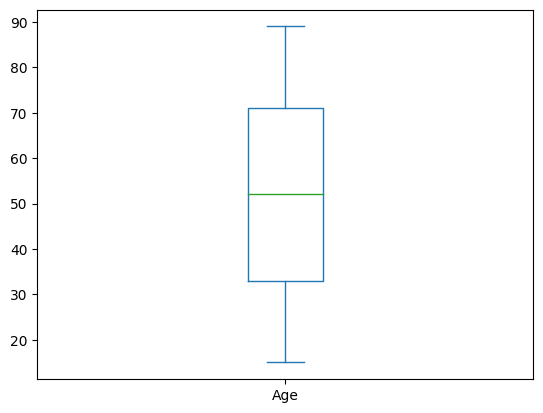

In [ ]:
ax = (df['Age']).plot.box()
ax.set_ylabel("Edad en años")

Un **boxplot** (diagrama de caja) es una herramienta de visualización gráfica utilizada para mostrar la **distribución de un conjunto de datos**. Se utiliza principalmente para resumir de manera clara y efectiva la dispersión y los puntos clave de un conjunto de datos numéricos. Este gráfico proporciona una visión rápida de los **valores centrales**, la **variabilidad** y los **valores atípicos** (outliers). 

### **Componentes clave de un Boxplot**:
1. **Caja (Box)**: Representa el **rango intercuartil** (IQR), que va del **primer cuartil (Q1)** al **tercer cuartil (Q3)**. Esto cubre el 50% central de los datos. La línea dentro de la caja es la **mediana** (Q2 o 50% cuantil), que es el valor que divide los datos en dos partes iguales.

2. **Bigotes (Whiskers)**: Se extienden desde los cuartiles (Q1 y Q3) hasta los valores máximos y mínimos dentro de un rango definido (por lo general, hasta 1.5 veces el rango intercuartil). Cualquier valor fuera de este rango se considera un **valor atípico**.

3. **Valores atípicos (Outliers)**: Los puntos que están fuera del rango de los bigotes (más allá de 1.5 veces el rango intercuartil) se consideran valores atípicos, es decir, valores que se desvían significativamente del resto de los datos.

### **¿Para qué sirve un Boxplot?**

1. **Visualización de la distribución**: Te ayuda a entender rápidamente cómo están distribuidos los datos y si la distribución es **simétrica** o **asimétrica**.
   
2. **Detección de valores atípicos**: Es muy efectivo para identificar **outliers** o valores que están significativamente alejados de la mayoría de los datos.

3. **Comparación de grupos**: Si tienes varios conjuntos de datos, los boxplots permiten compararlos visualmente. Por ejemplo, puedes usar boxplots para comparar las edades de diferentes grupos en tu conjunto de datos (por ejemplo, hombres vs mujeres, o diferentes categorías).

4. **Identificación de la mediana y los cuartiles**: Muestra la **mediana** y los cuartiles (Q1 y Q3) de manera clara, lo que te da una idea de la centralización y la dispersión de los datos.

5. **Simplicidad y claridad**: Es una forma concisa de mostrar los datos de manera efectiva, sin necesidad de observar distribuciones complejas o tablas largas de números.

### **Ejemplo práctico**:
Si estás analizando un conjunto de datos de **edades**, un boxplot te permitirá:
- Ver la **edad mediana** (la línea en la caja).
- Identificar si hay **asimetría** en las edades (por ejemplo, si los bigotes de un lado son más largos que el otro).
- Detectar **valores atípicos**, como edades muy altas o bajas que podrían no ser representativas del resto del grupo.

### **Resumen**:
En resumen, un **boxplot** es una herramienta útil para visualizar la **distribución** de los datos, la **mediana**, la **variabilidad** y la presencia de **outliers**. Es ampliamente utilizado en análisis exploratorio de datos y en estadística para comprender mejor los datos antes de aplicar modelos o tomar decisiones.

TABLAS DE FRECUENCIA E HISTOGRAMAS

La tabla de frecuencias de una variable divide el rango de una variable en segmentos igualmente
espaciados y nos dice cuantos valores caen dentro de cada segmento

In [ ]:
binned_population = pd.cut(df['Age'], 10)
print(binned_population.value_counts())

Age
(29.8, 37.2]      22948
(66.8, 74.2]      22779
(14.926, 22.4]    22661
(44.6, 52.0]      22633
(81.6, 89.0]      22401
(22.4, 29.8]      19996
(37.2, 44.6]      19903
(52.0, 59.4]      19877
(74.2, 81.6]      19842
(59.4, 66.8]      19651
Name: count, dtype: int64
